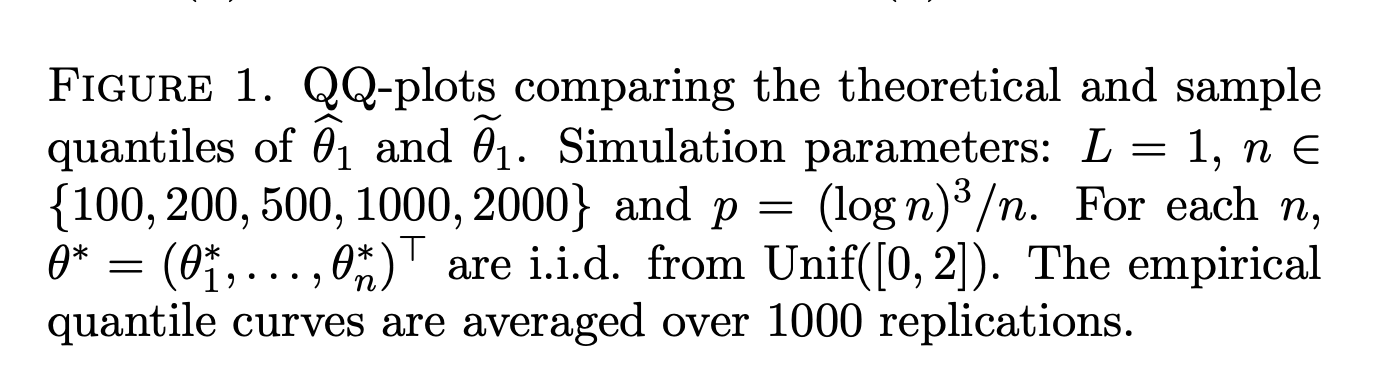


![img](pic.png)


In [20]:
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

sns.set_theme(style='darkgrid')

In [21]:
%load_ext autoreload
%autoreload 2

In [24]:
from btl_func import *
from btl_func_g import *
from data import *
from optim import GradientDescent
from estimate import *

from matplotlib import pyplot as plt

from constants import r_inf, tau_inf, rho_1
from utils import normalize
from btl_func import F
from tqdm.auto import tqdm
from btl_func import calc_zeta_grad
import constants

In [18]:
gamma = 0.9
ds = np.array(range(2, 3000))
best_ks = []
best_vals = []
for d in ds:
    ks = np.array(range(1, d + 1))
    values = np.log(ks) + gamma * (np.log(d) - np.log(ks))
    values /= ks + gamma * (d - ks)
    best_ks.append(np.argmax(values))
    best_vals.append(values[best_ks[-1]])

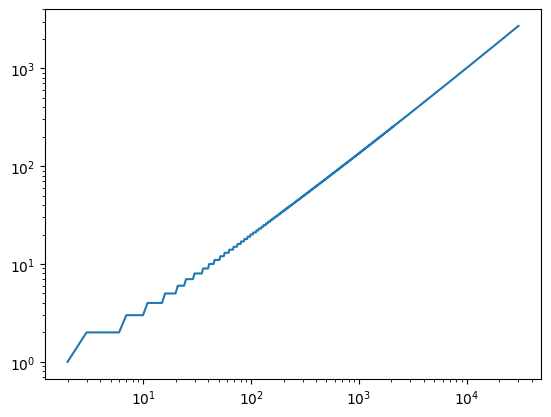

In [16]:
plt.plot(ds, best_ks)
plt.xscale("log")
plt.yscale("log")

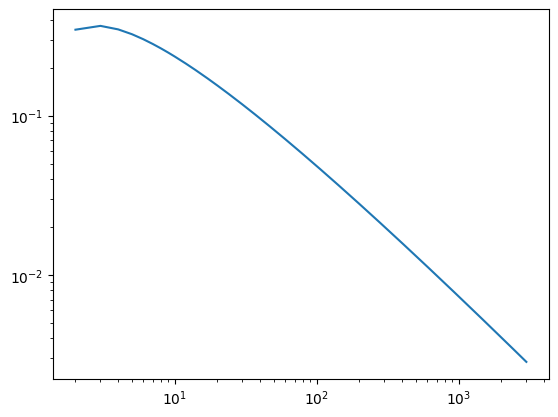

In [19]:
plt.plot(ds, best_vals)
plt.xscale("log")
plt.yscale("log")

data.v [-0.26964468 -0.31323496]


 45%|████▍     | 4455/10000 [00:00<00:00, 81434.10it/s]

norm v_star [ 0.02179486 -0.02179486]
norm real v [ 0.02179514 -0.02179514]
grad at true [0. 0.]
grad at star [ 7.04825356e-07 -7.04825357e-07]


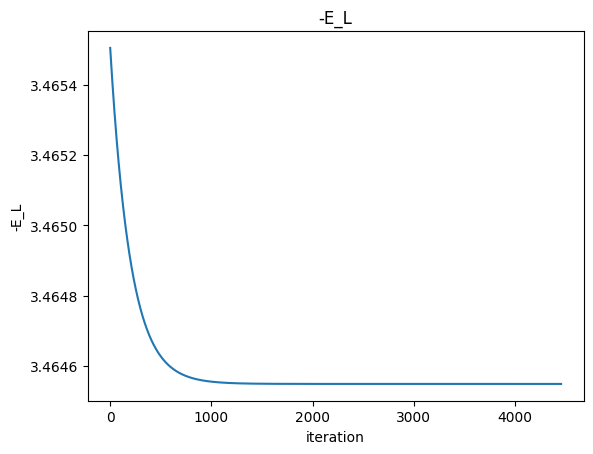

In [ ]:
def check_E_L():

    data = GaoData(2, 1, 5, (-1, 1))
    print("data.v", data.v)

    v_star, log_f, log_iters = GradientDescent(
        lambda v: -calc_E_L_grad(data, v),
        np.random.rand(data.p),
        alpha=1e-3,
        max_iter=10000,
        f=lambda v: -calc_E_L(data, v),
        verbose_iter=1,
    )

    print("norm v_star", normalize(v_star))

    print("norm real v", normalize(data.v))

    assert np.allclose(normalize(v_star), normalize(data.v), atol=1e-3)

    print("grad at true", calc_E_L_grad(data, data.v))
    print("grad at star", calc_E_L_grad(data, v_star))

    plt.plot(log_iters, log_f)
    plt.title("-E_L")
    plt.xlabel("iteration")
    plt.ylabel("-E_L")
    plt.show()


check_E_L()

## Check correctness of EL optimization (we have no misspecification here)


  6%|▌         | 57/1000 [00:00<00:00, 49869.70it/s]

gradient at true [0. 0.]
gradient at star [ 4.53433455e-07 -4.53433454e-07]
v_star [ 0.28761059 -0.28761059]
v_true [ 0.28761068 -0.28761068]


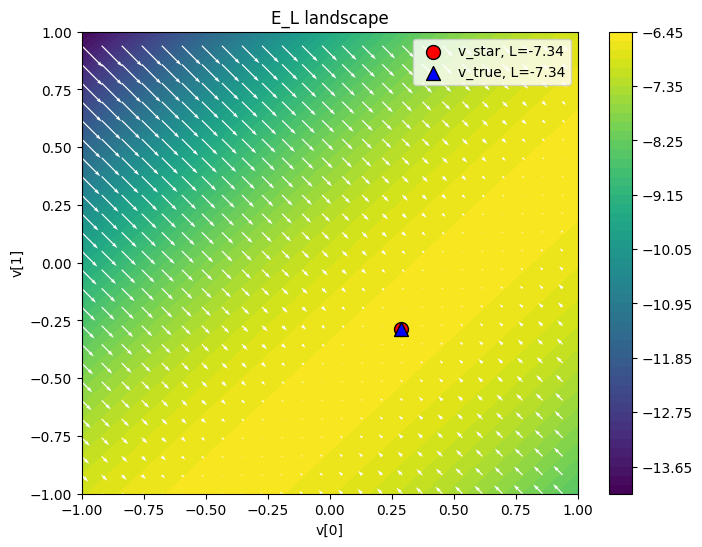

In [7]:
def plot_E_L(data):
    v_true = normalize(data.v)
    v_star = normalize(calc_v_star(data))
    # v_g_star = normalize(calc_v_g_star(data, 1))

    print("gradient at true", calc_E_L_grad(data, data.v))
    print("gradient at star", calc_E_L_grad(data, v_star))
    print("v_star", v_star)
    print("v_true", v_true)
    assert np.allclose(v_star, v_true, atol=1e-3)

    lin = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(lin, lin)
    Z = np.empty_like(X)
    U = np.empty_like(X)
    V = np.empty_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            v_point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = calc_E_L(data, v_point)
            grad = calc_E_L_grad(data, v_point)
            U[i, j] = grad[0]
            V[i, j] = grad[1]

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.quiver(
        X[::4, ::4], Y[::4, ::4], U[::4, ::4], V[::4, ::4], color="white"
    )
    plt.scatter(
        v_star[0],
        v_star[1],
        s=100,
        color="red",
        marker="o",
        edgecolors="black",
        label=f"v_star, L={calc_L(data, v_star):.2f}",
    )
    plt.scatter(
        v_true[0],
        v_true[1],
        s=100,
        color="blue",
        marker="^",
        edgecolors="black",
        label=f"v_true, L={calc_L(data, v_true):.2f}",
    )

    plt.colorbar(cp)
    plt.xlabel("v[0]")
    plt.ylabel("v[1]")
    plt.title("E_L landscape")
    plt.legend()
    plt.show()


data = GaoData(2, 0.5, 10, (-1, 1))
plot_E_L(data)

without misspecification $v^\ = \arg \max E*{v*{true}}L(\theta) $ is equal to the true value.


 28%|██▊       | 277/1000 [00:00<00:00, 103512.31it/s]

true v is  [-0.50678746 -0.77411146]
grad at true [ 0.33564165 -0.33564165]


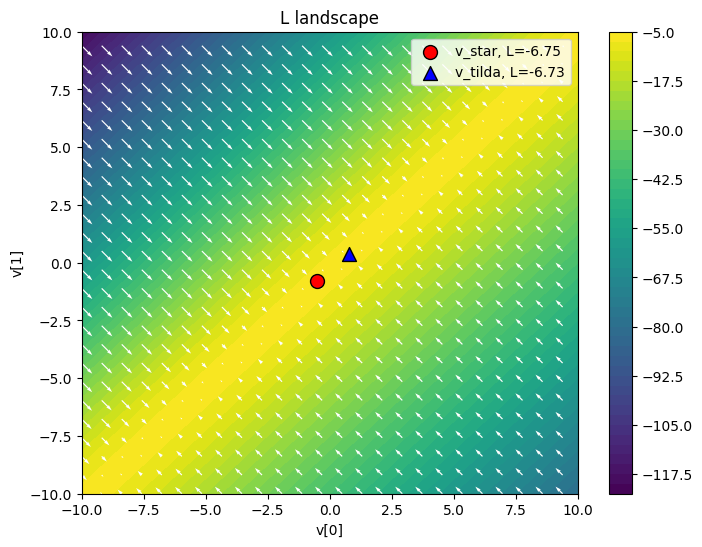

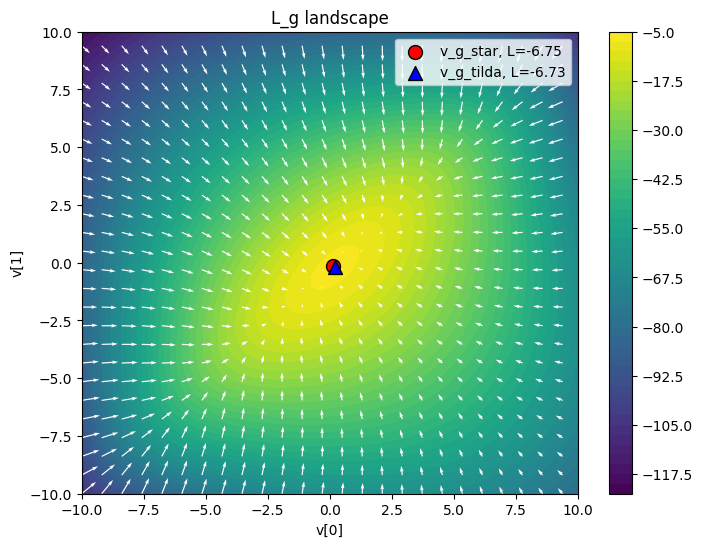

In [11]:
def plot_L(data: GaoData, g_l: float):
    v_star = data.v
    v_tilda = calc_v_tilda(data)
    v_g_star = calc_v_g_star(data, g_l)
    v_g_tilda = calc_v_g_tilda(data, g_l)

    print("true v is ", data.v)
    print("grad at true", calc_L_grad(data, data.v))
    lin = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(lin, lin)
    Z = np.empty_like(X)
    U = np.empty_like(X)
    V = np.empty_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            v_point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = calc_L(data, v_point)
            grad = calc_L_grad(data, v_point)
            U[i, j] = grad[0]
            V[i, j] = grad[1]

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.quiver(
        X[::4, ::4], Y[::4, ::4], U[::4, ::4], V[::4, ::4], color="white"
    )
    plt.colorbar(cp)
    plt.xlabel("v[0]")
    plt.ylabel("v[1]")
    plt.title("L landscape")

    plt.scatter(
        v_star[0],
        v_star[1],
        s=100,
        color="red",
        marker="o",
        edgecolors="black",
        label=f"v_star, L={calc_L(data, v_star):.2f}",
    )
    plt.scatter(
        v_tilda[0],
        v_tilda[1],
        s=100,
        color="blue",
        marker="^",
        edgecolors="black",
        label=f"v_tilda, L={calc_L(data, v_tilda):.2f}",
    )
    plt.legend()
    plt.show()

    lin = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(lin, lin)
    Z = np.empty_like(X)
    U = np.empty_like(X)
    V = np.empty_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            v_point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = calc_L_g(data, v_point, 1)
            grad = calc_L_g_grad(data, v_point, 1)
            U[i, j] = grad[0]
            V[i, j] = grad[1]

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.quiver(
        X[::4, ::4], Y[::4, ::4], U[::4, ::4], V[::4, ::4], color="white"
    )
    plt.colorbar(cp)
    plt.xlabel("v[0]")
    plt.ylabel("v[1]")
    plt.title("L_g landscape")

    plt.scatter(
        v_g_star[0],
        v_g_star[1],
        s=100,
        color="red",
        marker="o",
        edgecolors="black",
        label=f"v_g_star, L={calc_L(data, v_g_star):.2f}",
    )
    plt.scatter(
        v_g_tilda[0],
        v_g_tilda[1],
        s=100,
        color="blue",
        marker="^",
        edgecolors="black",
        label=f"v_g_tilda, L={calc_L(data, v_g_tilda):.2f}",
    )
    plt.legend()
    plt.show()

    return v_star, v_tilda, v_g_star, v_g_tilda


data = GaoData(2, 1, 10, (-1, 1))
v_star, v_tilda, v_g_star, v_g_tilda = plot_L(data, 1)

Here $v^*$ is a true parameter, $$v^* = \arg \max E_{v*}L(v)$$ was double checked before

regularized solution:
$$v^*_g = \arg \max E_{v*} L_g(v) $$

- we must have $L(v^*_g) = L(v^*)$,
- we must have $v^*_g = v^* - mean(v^*)$ in a non-degenerate case (the only 0 eigenvalue of fisher matrix is the vector of ones)
- we must have $\sum v^*_g = 0$

All of the above also holds for $\tilde{v}$ and $\tilde{v_g}$


In [12]:
print("v_g_star", v_g_star)
print("v_star", v_star)
print("v_g_tilda", v_g_tilda)
print("v_tilda", v_tilda)

v_g_star [ 0.13366266 -0.13366135]
v_star [-0.50678746 -0.77411146]
v_g_tilda [ 0.20273322 -0.20273189]
v_tilda [0.76261249 0.35714759]


In [17]:
assert np.allclose(calc_L(data, v_g_star), calc_L(data, v_star))
assert np.allclose(calc_L(data, v_g_tilda), calc_L(data, v_tilda))

In [16]:
assert np.allclose(v_g_star.sum(), 0, atol=1e-5)
assert np.allclose(v_g_tilda.sum(), 0, atol=1e-5)

In [18]:
assert np.allclose(v_g_star, v_star - np.mean(v_star))
assert np.allclose(v_g_tilda, v_tilda - np.mean(v_tilda))

## Constants estimation


![img2](pic2.png)


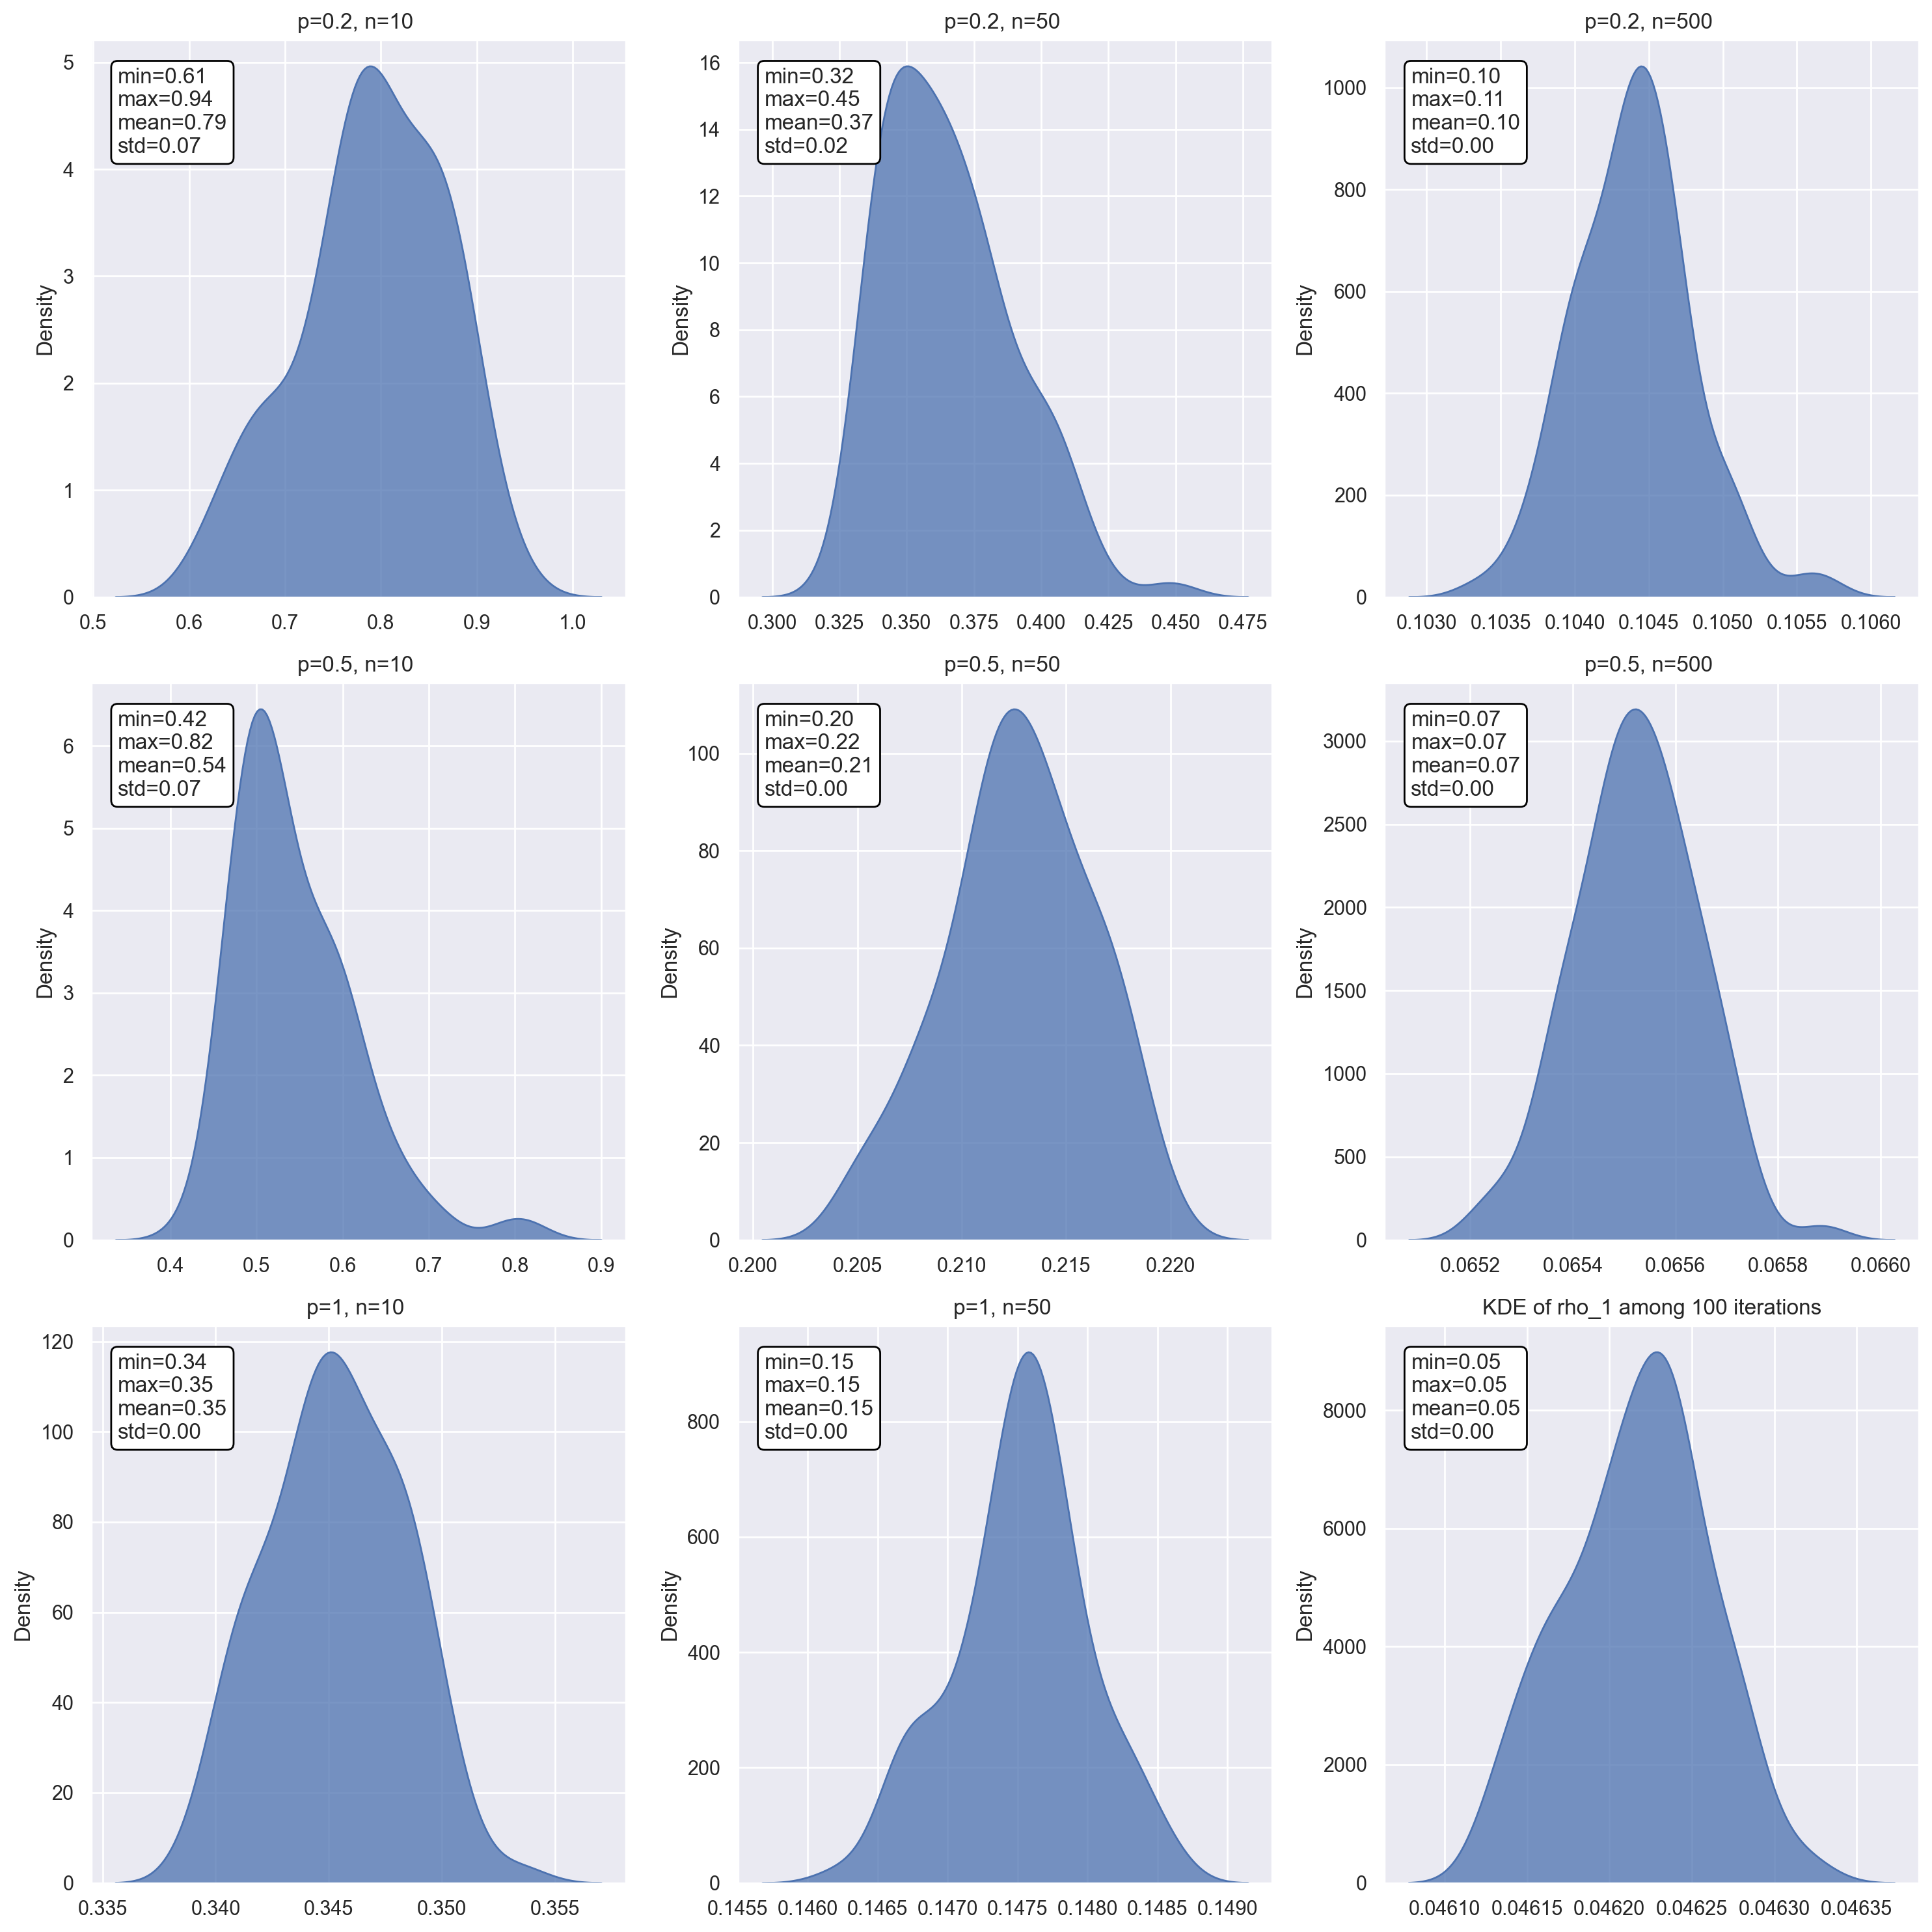

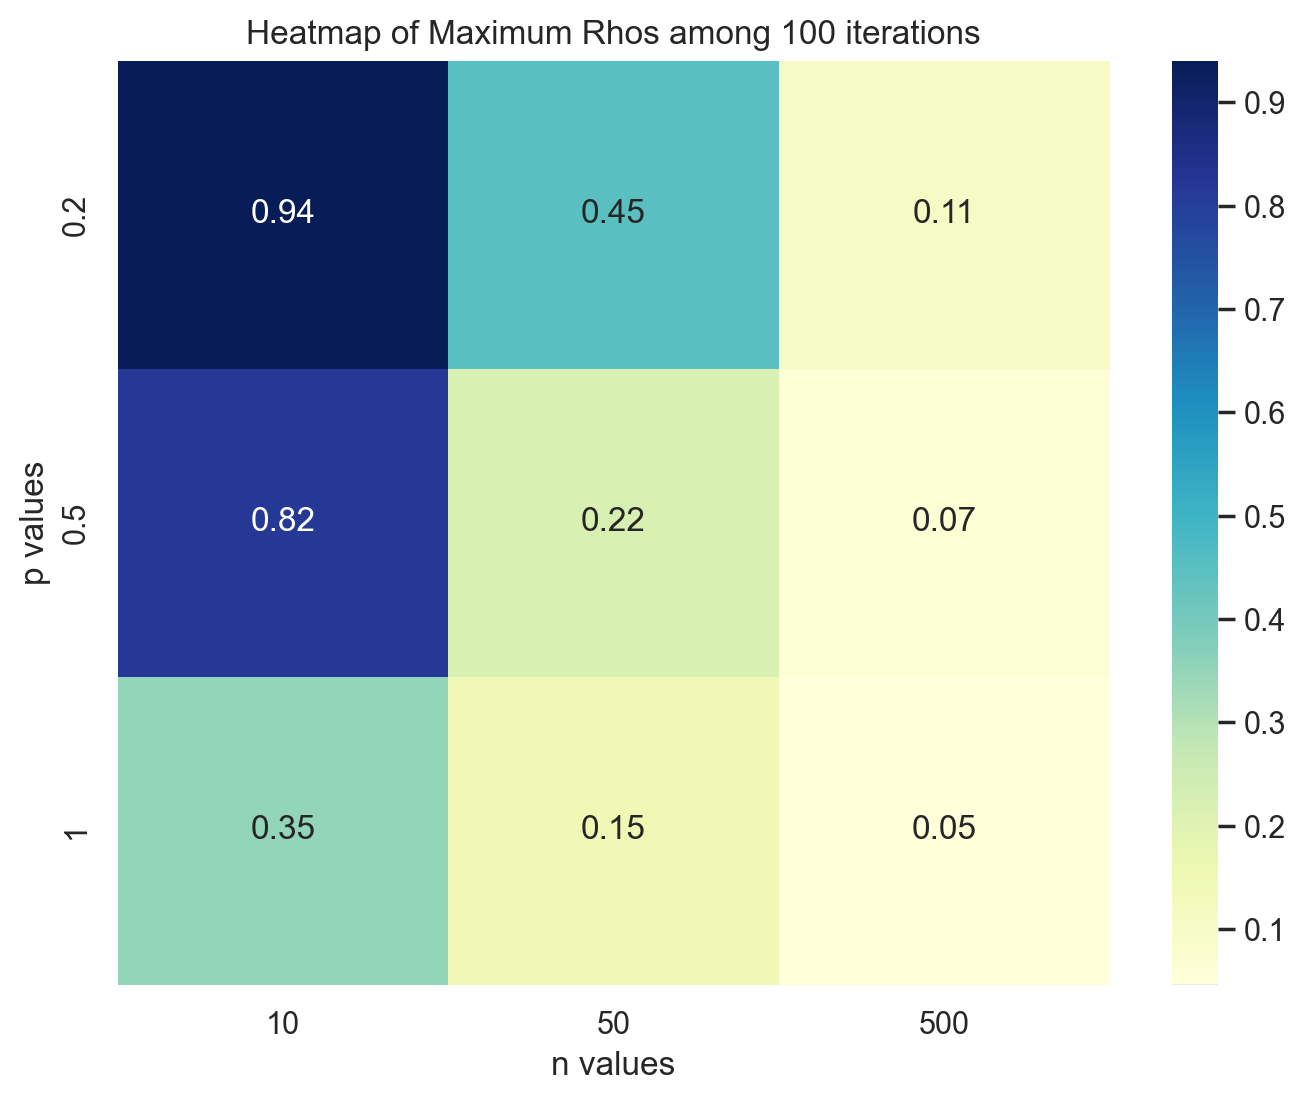

In [22]:
from constants import rho_1
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def make_rho_1_kde_and_heatmap_plots(max_iter=100):
    prob_values = [0.2, 0.5, 1]
    p_values = [10, 50, 500]
    fig_kde, axes_kde = plt.subplots(3, 3, figsize=(15, 15))
    max_rhos = np.zeros((3, 3))

    for i, p in enumerate(prob_values):
        for j, n in enumerate(p_values):
            rhos = []
            for iter in range(max_iter):
                data = GaoData(int(n), p, L=1, v_range=[0, 2])
                F_matrix = F(data.v, data.N)
                rhos.append(rho_1(F_matrix))

            ax_kde = axes_kde[i, j]
            sns.kdeplot(rhos, ax=ax_kde, fill=True, alpha=0.75)
            ax_kde.set_title(f"p={p}, n={int(n)} ")
            ax_kde.annotate(
                f"min={np.min(rhos):.2f}\nmax={np.max(rhos):.2f}\nmean={np.mean(rhos):.2f}\nstd={np.std(rhos):.2f}",
                xy=(0.05, 0.95),
                xycoords="axes fraction",
                verticalalignment="top",
                horizontalalignment="left",
                bbox=dict(
                    boxstyle="round,pad=0.3",
                    edgecolor="black",
                    facecolor="white",
                ),
            )
            max_rhos[i, j] = np.max(rhos)
    plt.title(f"KDE of rho_1 among {max_iter} iterations")
    plt.tight_layout()
    plt.show()

    # Create a heatmap for the maximum values of rhos
    fig_heatmap, ax_heatmap = plt.subplots(figsize=(8, 6))
    sns.heatmap(
        max_rhos,
        annot=True,
        fmt=".2f",
        ax=ax_heatmap,
        cmap="YlGnBu",
        xticklabels=p_values,
        yticklabels=prob_values,
    )
    ax_heatmap.set_xlabel("n values")
    ax_heatmap.set_ylabel("p values")
    ax_heatmap.set_title(f"Heatmap of Maximum Rhos among {max_iter} iterations")
    plt.show()


make_rho_1_kde_and_heatmap_plots(100)

100%|██████████| 7/7 [00:41<00:00,  5.87s/it]


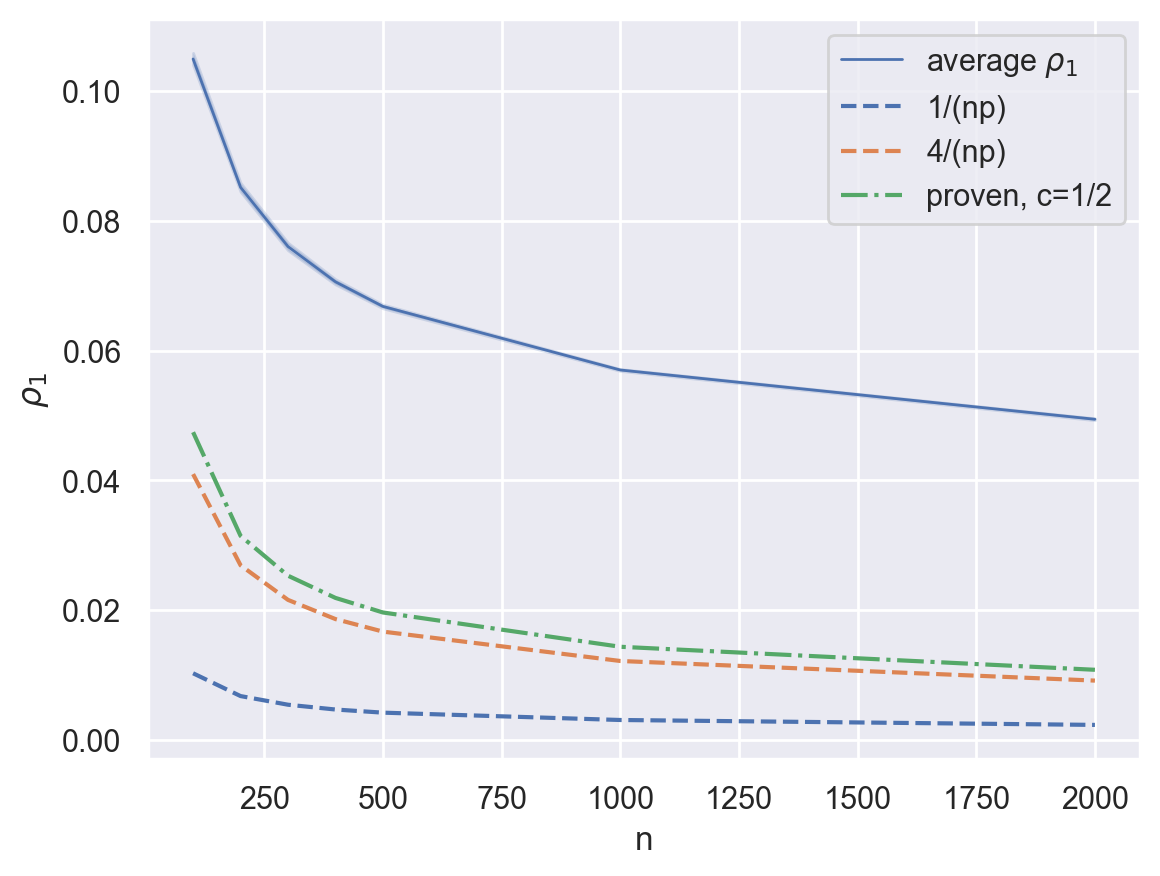

In [23]:
from tqdm.auto import tqdm
import numpy as np
from constants import rho_1
from matplotlib import pyplot as plt


# TODO rename to rho_1 squared everywhere


def sample_rho(n, p):
    data = GaoData(int(n), p, L=1, v_range=[0, 2])
    F_matrix = F(data.v, data.N)
    return rho_1(F_matrix)


def plot_rho(p, max_iter=10):
    ns = [100, 200, 300, 400, 500, 1000, 2000]
    means = []
    stds = []
    inv_np = []
    proven = []
    for n in tqdm(ns):
        rhos = [sample_rho(n, p(n)) for _ in range(max_iter)]
        means.append(np.mean(rhos))
        stds.append(np.std(rhos))
        inv_np.append(1 / (n * p(n)))
        c = 1 / 2
        proven.append(1 / (1 + 4 * (n * p(n) * c - 1) * phi_2(2)))

    means = np.array(means)
    stds = np.array(stds)

    plt.plot(ns, means, "b-", linewidth=1, label=r"average $\rho_1$")
    plt.fill_between(
        ns, means - 3 * stds, means + 3 * stds, color="b", alpha=0.2
    )

    plt.plot(ns, inv_np, label="1/(np)", linestyle="--")
    plt.plot(ns, 4 * np.array(inv_np), label="4/(np)", linestyle="--")
    plt.plot(ns, proven, label="proven, c=1/2", linestyle="-.")
    plt.xlabel("n")
    plt.ylabel(r"$\rho_1$")
    # plt.yscale("log")
    # plt.xscale("log")
    plt.legend()
    plt.show()


plot_rho(lambda n: (np.log(n) ** 3) / n)

## Theorem 2.3


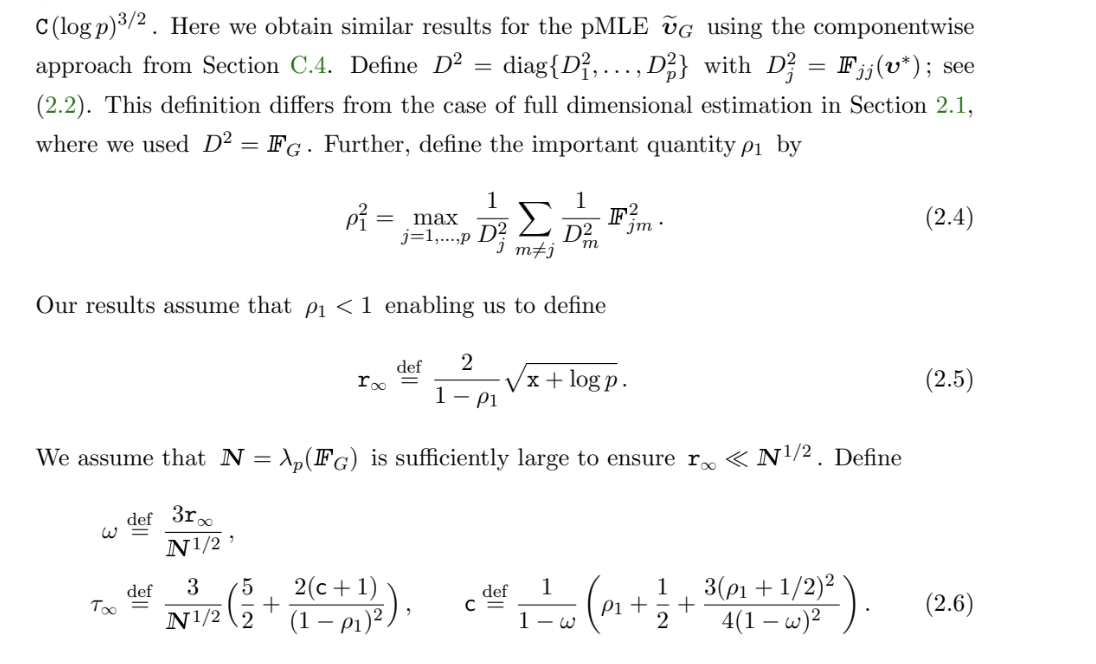


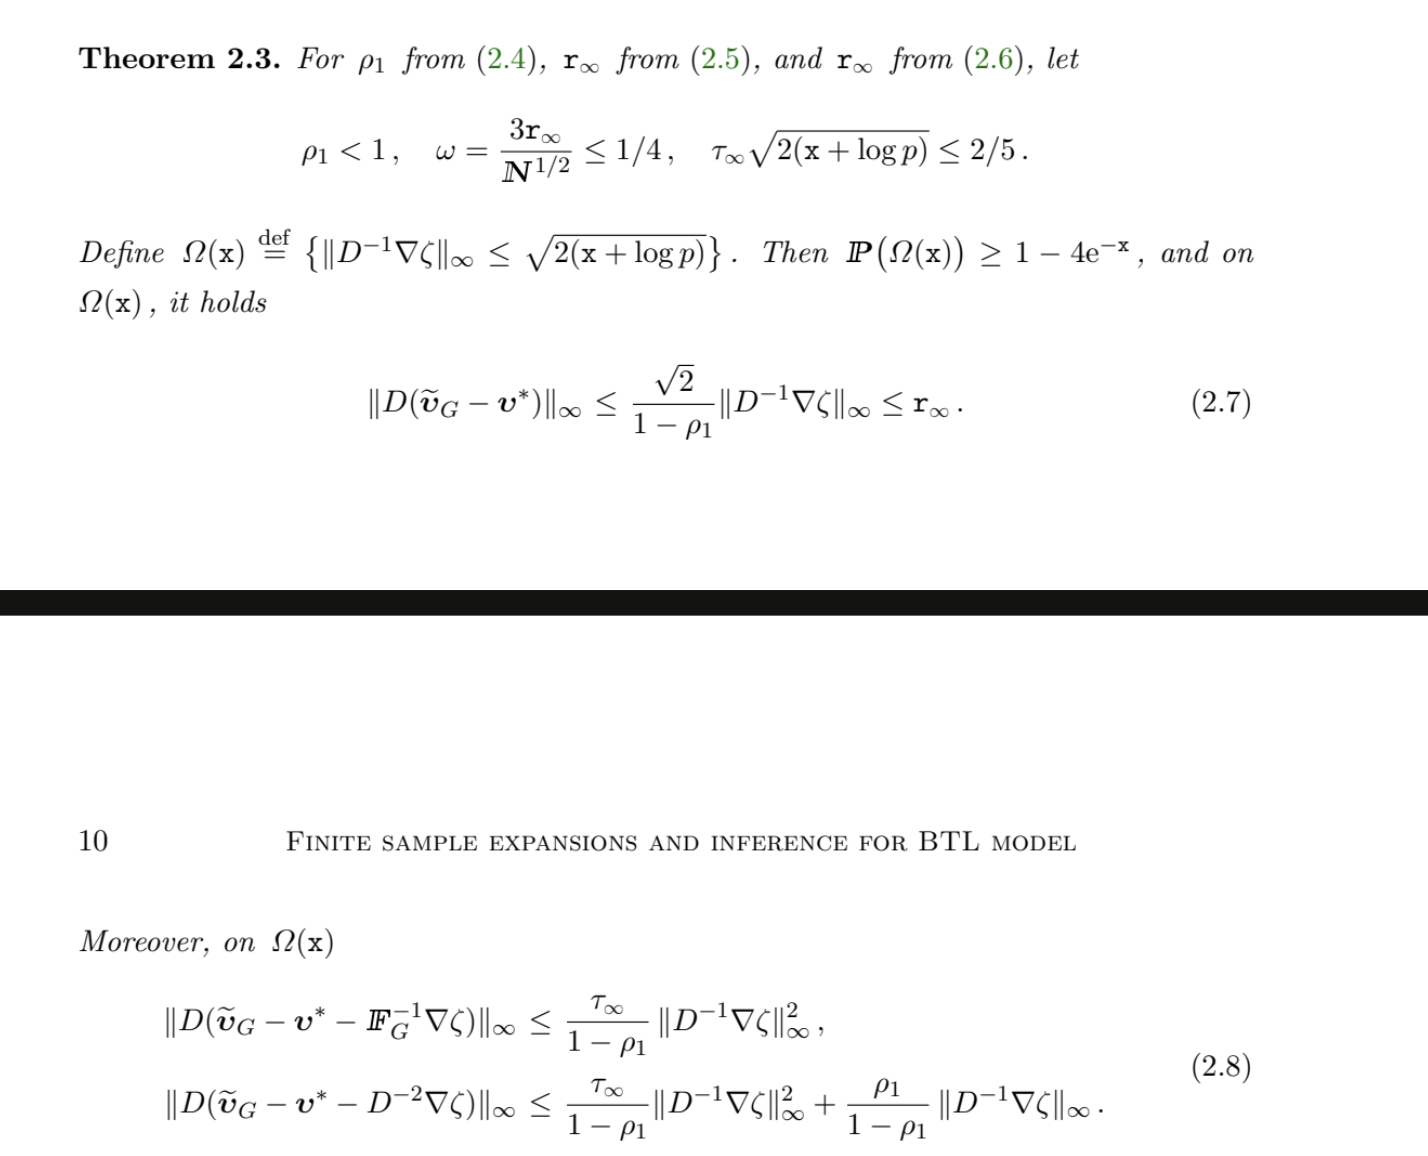


In [6]:
def gao_p(n):
    """
    Gao's p function
    """
    return (np.log(n) ** 3) / n


def calc_D(data: GaoData):
    """
    Calculate the D function as defined for 2.4
    """
    D_squared = np.diag(F(data.v, data.N))
    return np.sqrt(D_squared)


def inf_norm(v):
    return np.max(np.abs(v))

In [32]:
def theorem_2_3(x):
    n = 1500
    p = 1
    L = 150
    v_range = [0, 1]
    g = 10000
    left_2_7s = []
    right_2_7s = []
    left_2_8_ups = []
    right_2_8_ups = []
    left_2_8_downs = []
    right_2_8_downs = []
    Ns = []
    omegas = []
    tau_infs = []
    cs = []
    r_infs = []
    rho_1s = []
    for i in tqdm(range(10)):
        data = GaoData(n, p, L=L, v_range=v_range)
        F_val = F(data.v, data.N)
        F_g_val = F_g(data.v, data.N, g)
        D = np.sqrt(np.diag(F_val))

        v_g_tilda = calc_v_g_tilda_sum_reg(data, g)
        v_star = normalize(data.v)
        dzeta_grad = calc_zeta_grad(data, v_star)

        left_2_7 = inf_norm((v_g_tilda - v_star) * D)
        right_2_7 = r_inf(x, F_val)

        rho_1_val = rho_1(F_val)
        rho_1s.append(rho_1_val)
        Ns.append(constants.N(F_g_val))
        omegas.append(constants.omega(x, F_val, F_g_val))
        tau_infs.append(tau_inf(x, F_val, F_g_val))
        cs.append(constants.c(x, F_val, F_g_val))
        r_infs.append(constants.r_inf(x, F_val))

        left_2_8_up = inf_norm(
            D * (v_g_tilda - v_star - np.linalg.inv(F_g_val) @ dzeta_grad)
        )
        right_2_8_up = (
            tau_inf(x, F_val, F_g_val)
            / (1 - rho_1_val)
            * (inf_norm(dzeta_grad / D) ** 2)
        )

        left_2_8_down = inf_norm(D * (v_g_tilda - v_star - dzeta_grad / (D**2)))
        right_2_8_down = tau_inf(x, F_val, F_g_val) / (1 - rho_1_val) * (
            inf_norm(dzeta_grad / D) ** 2
        ) + (rho_1_val / (1 - rho_1_val)) * (inf_norm(dzeta_grad / D))

        left_2_7s.append(left_2_7)
        right_2_7s.append(right_2_7)
        left_2_8_ups.append(left_2_8_up)
        right_2_8_ups.append(right_2_8_up)
        left_2_8_downs.append(left_2_8_down)
        right_2_8_downs.append(right_2_8_down)

    print(f"rho_1 = {np.mean(rho_1s):.4f} ± {np.std(rho_1s):.4f} <  1")
    print(f"omega = {np.mean(omegas):.4f} ± {np.std(omegas):.4f} <=  1/4")
    print(
        f"r inf = {np.mean(r_infs):.4f} ± {np.std(r_infs):.4f} << N1/2 = {np.mean(np.sqrt(Ns)):.4f} ± {np.std(np.sqrt(Ns)):.4f}"
    )
    print(
        f"tau inf * sqrt(2(x + logp)) = {(np.mean(tau_infs)*np.sqrt(2*(x+np.log(n)))):.4f} ± {(np.std(tau_infs)*np.sqrt(2*(x+np.log(n)))):.4f} <= {2/5:.4f}"
    )

    print(f"left 2.7 = {np.mean(left_2_7s)} ± {np.std(left_2_7s)}")
    print(f"right 2.7 = {np.mean(right_2_7s)} ± {np.std(right_2_7s)}")
    print(f"left 2.8 F = {np.mean(left_2_8_ups)} ± {np.std(left_2_8_ups)}")
    print(f"left 2.8 D = {np.mean(left_2_8_downs)} ± {np.std(left_2_8_downs)}")
    print(f"right 2.8 F = {np.mean(right_2_8_ups)} ± {np.std(right_2_8_ups)}")
    print(
        f"right 2.8 D = {np.mean(right_2_8_downs)} ± {np.std(right_2_8_downs)}"
    )

In [33]:
theorem_2_3(x=2)  # corresponds to 1 - 4e^-2 probability

100%|██████████| 10/10 [31:49<00:00, 190.99s/it]

rho_1 = 0.0261 ± 0.0000 <  1
omega = 0.0834 ± 0.0001 <=  1/4
r inf = 6.2670 ± 0.0000 << N1/2 = 225.4625 ± 0.1378
tau inf * sqrt(2(x + logp)) = 0.3668 ± 0.0002 <= 0.4000
left 2.7 = 3.595298002443509 ± 0.25867005314246944
right 2.7 = 6.2669541337890236 ± 2.413026559264405e-05
left 2.8 F = 0.004995929780115217 ± 0.0005561191384110988
left 2.8 D = 0.006218923123433015 ± 0.0014669067458207717
right 2.8 F = 1.1346464851874019 ± 0.16229319231361872
right 2.8 D = 1.2309558416174187 ± 0.16923984889230637


- ошибка 2.7 сильно больше 2.8, так что разложение верно и главный член реально главный
- в 2.7 адекватная граница сверху
- В случае 2.8 очень сильная граница сверху, tau inf немалеьнкое, из-за чего не видно, насколько оно хорошее


Дальше нам не важны неравенства, и вероятности, а значит и условия на константы. Просто в разных сеттингах оценим ошибку в терминах 2.7 и 2.8


100%|██████████| 200/200 [02:55<00:00,  1.14it/s]


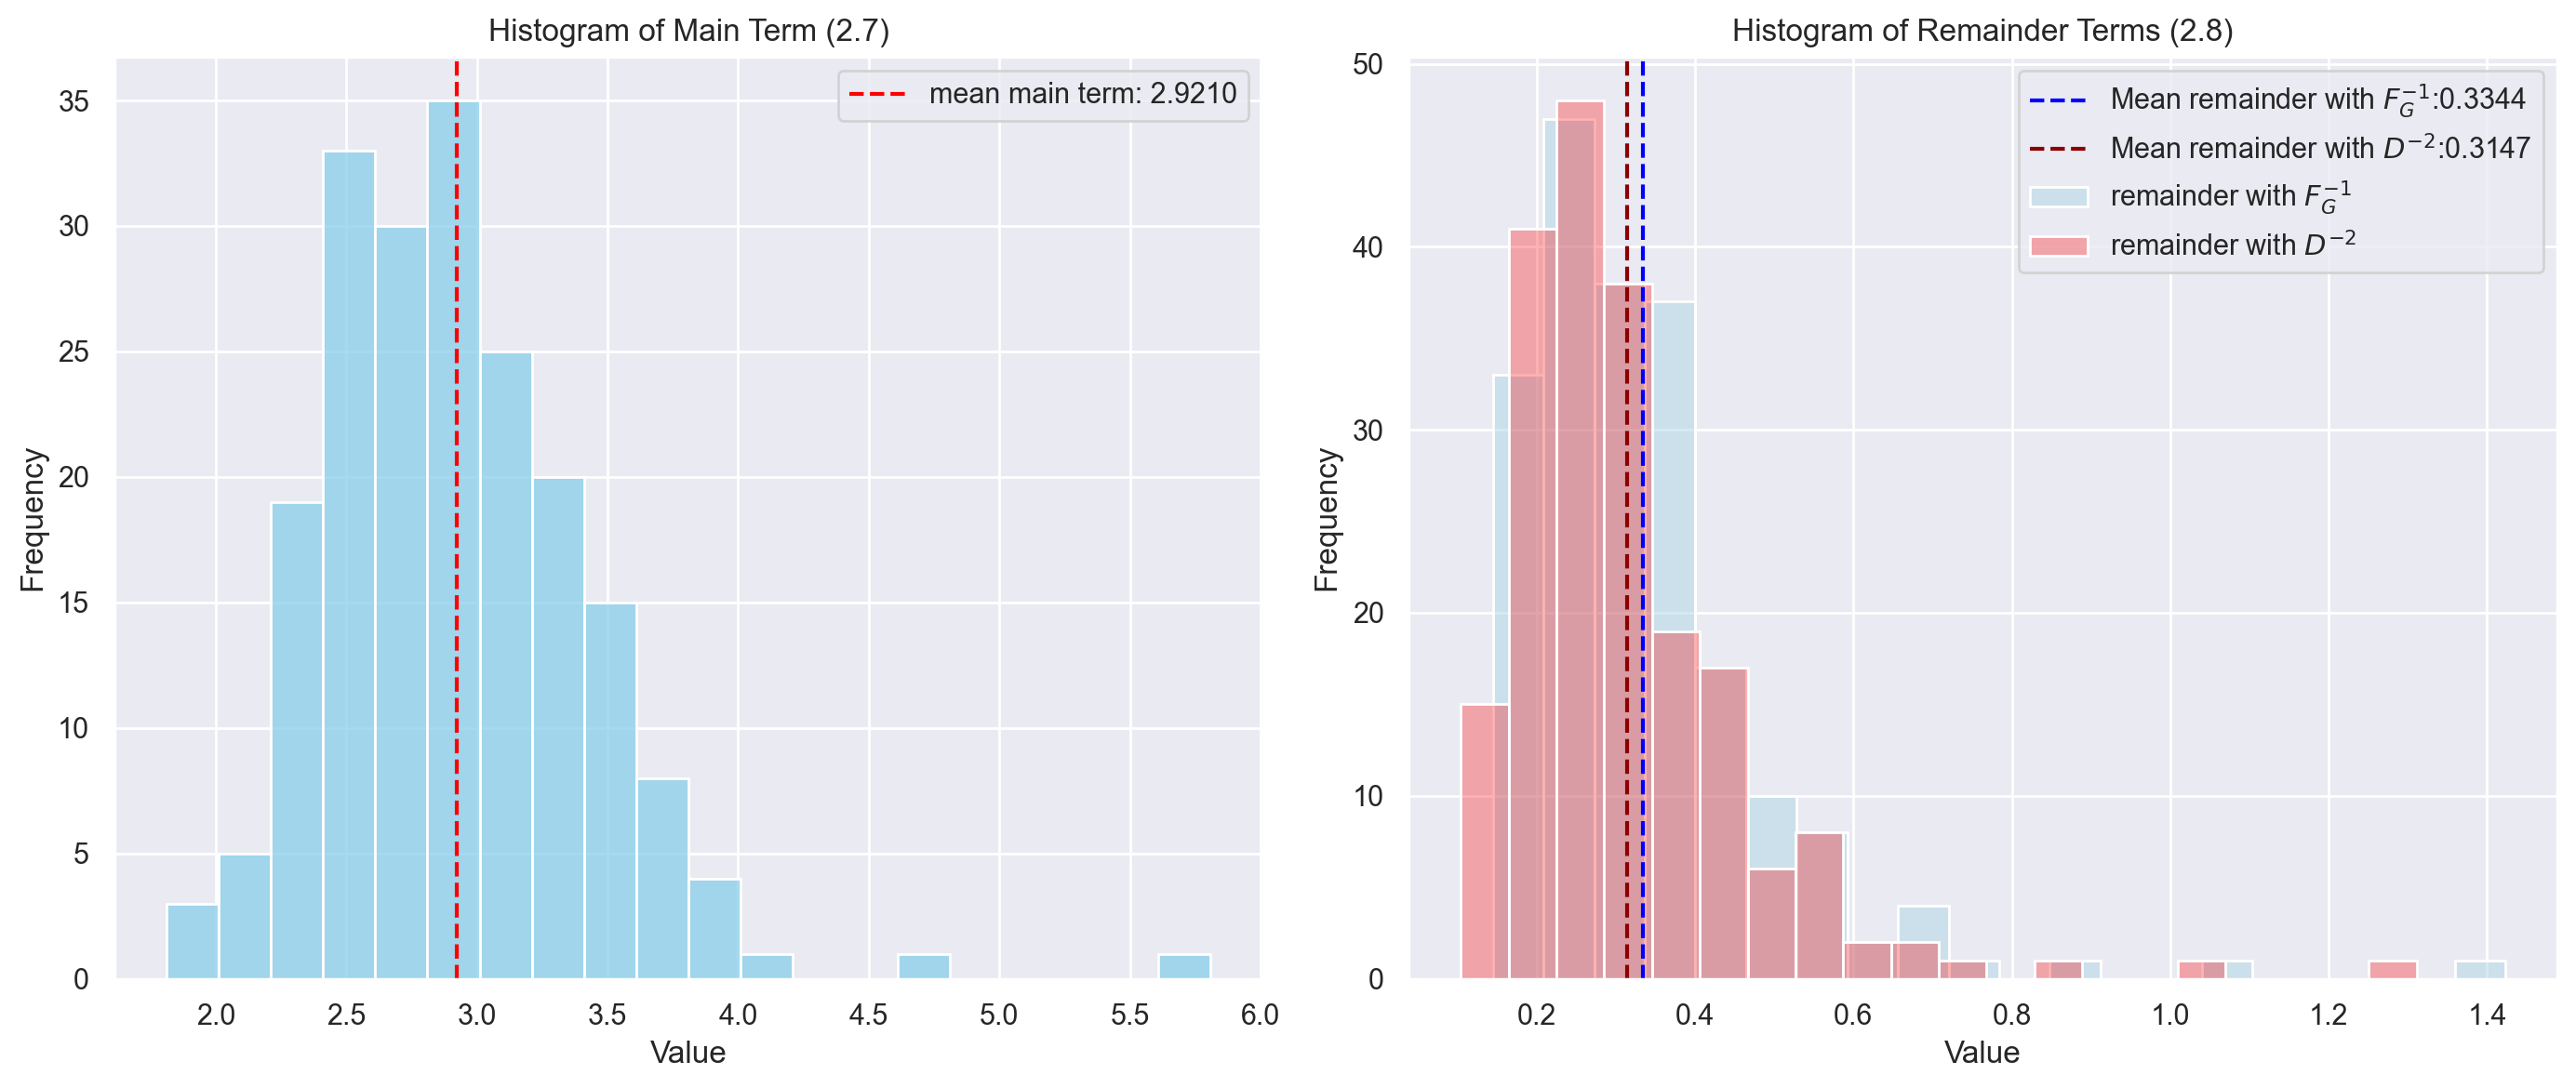

In [17]:
def theorem_2_3():
    n = 100
    p = gao_p(n)
    L = 1
    v_range = [0, 2]
    g = 10000
    left_2_7s = []
    left_2_8_ups = []
    left_2_8_downs = []

    for i in tqdm(range(200)):
        data = GaoData(n, p, L=L, v_range=v_range)
        F_val = F(data.v, data.N)
        F_g_val = F_g(data.v, data.N, g)
        D = np.sqrt(np.diag(F_val))

        v_g_tilda = calc_v_g_tilda_sum_reg(data, g)
        v_star = normalize(data.v)
        dzeta_grad = calc_zeta_grad(data, v_star)

        left_2_7 = inf_norm((v_g_tilda - v_star) * D)
        left_2_8_up = inf_norm(
            D * (v_g_tilda - v_star - np.linalg.inv(F_g_val) @ dzeta_grad)
        )
        left_2_8_down = inf_norm(D * (v_g_tilda - v_star - dzeta_grad / (D**2)))

        left_2_7s.append(left_2_7)
        left_2_8_ups.append(left_2_8_up)
        left_2_8_downs.append(left_2_8_down)

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # First subplot: histogram of left_2_7s with mean value
    sns.histplot(left_2_7s, bins=20, ax=axs[0], color="skyblue", kde=False)
    mean_27 = np.mean(left_2_7s)
    axs[0].axvline(
        mean_27,
        color="red",
        linestyle="--",
        label=f"mean main term: {mean_27:.4f}",
    )
    axs[0].set_title("Histogram of Main Term (2.7)")
    axs[0].set_xlabel("Value")
    axs[0].set_ylabel("Frequency")
    axs[0].legend()

    # Second subplot: histograms of left_2_8_up and left_2_8_down with mean values
    sns.histplot(
        left_2_8_ups,
        bins=20,
        ax=axs[1],
        color="lightblue",
        kde=False,
        label=r"remainder with $F_G^{-1}$",
        alpha=0.5,
    )
    sns.histplot(
        left_2_8_downs,
        bins=20,
        ax=axs[1],
        color="red",
        kde=False,
        label=r"remainder with $D^{-2}$",
        alpha=0.3,
    )
    mean_28_up = np.mean(left_2_8_ups)
    mean_28_down = np.mean(left_2_8_downs)
    axs[1].axvline(
        mean_28_up,
        color="blue",
        linestyle="--",
        label=r"Mean remainder with $F_G^{-1}$:" + f"{mean_28_up:.4f}",
    )
    axs[1].axvline(
        mean_28_down,
        color="darkred",
        linestyle="--",
        label=r"Mean remainder with $D^{-2}$:" + f"{mean_28_down:.4f}",
    )
    axs[1].set_title("Histogram of Remainder Terms (2.8)")
    axs[1].set_xlabel("Value")
    axs[1].set_ylabel("Frequency")
    axs[1].legend()

    plt.tight_layout()
    plt.show()


theorem_2_3()

100%|██████████| 5/5 [1:23:27<00:00, 1001.48s/it]


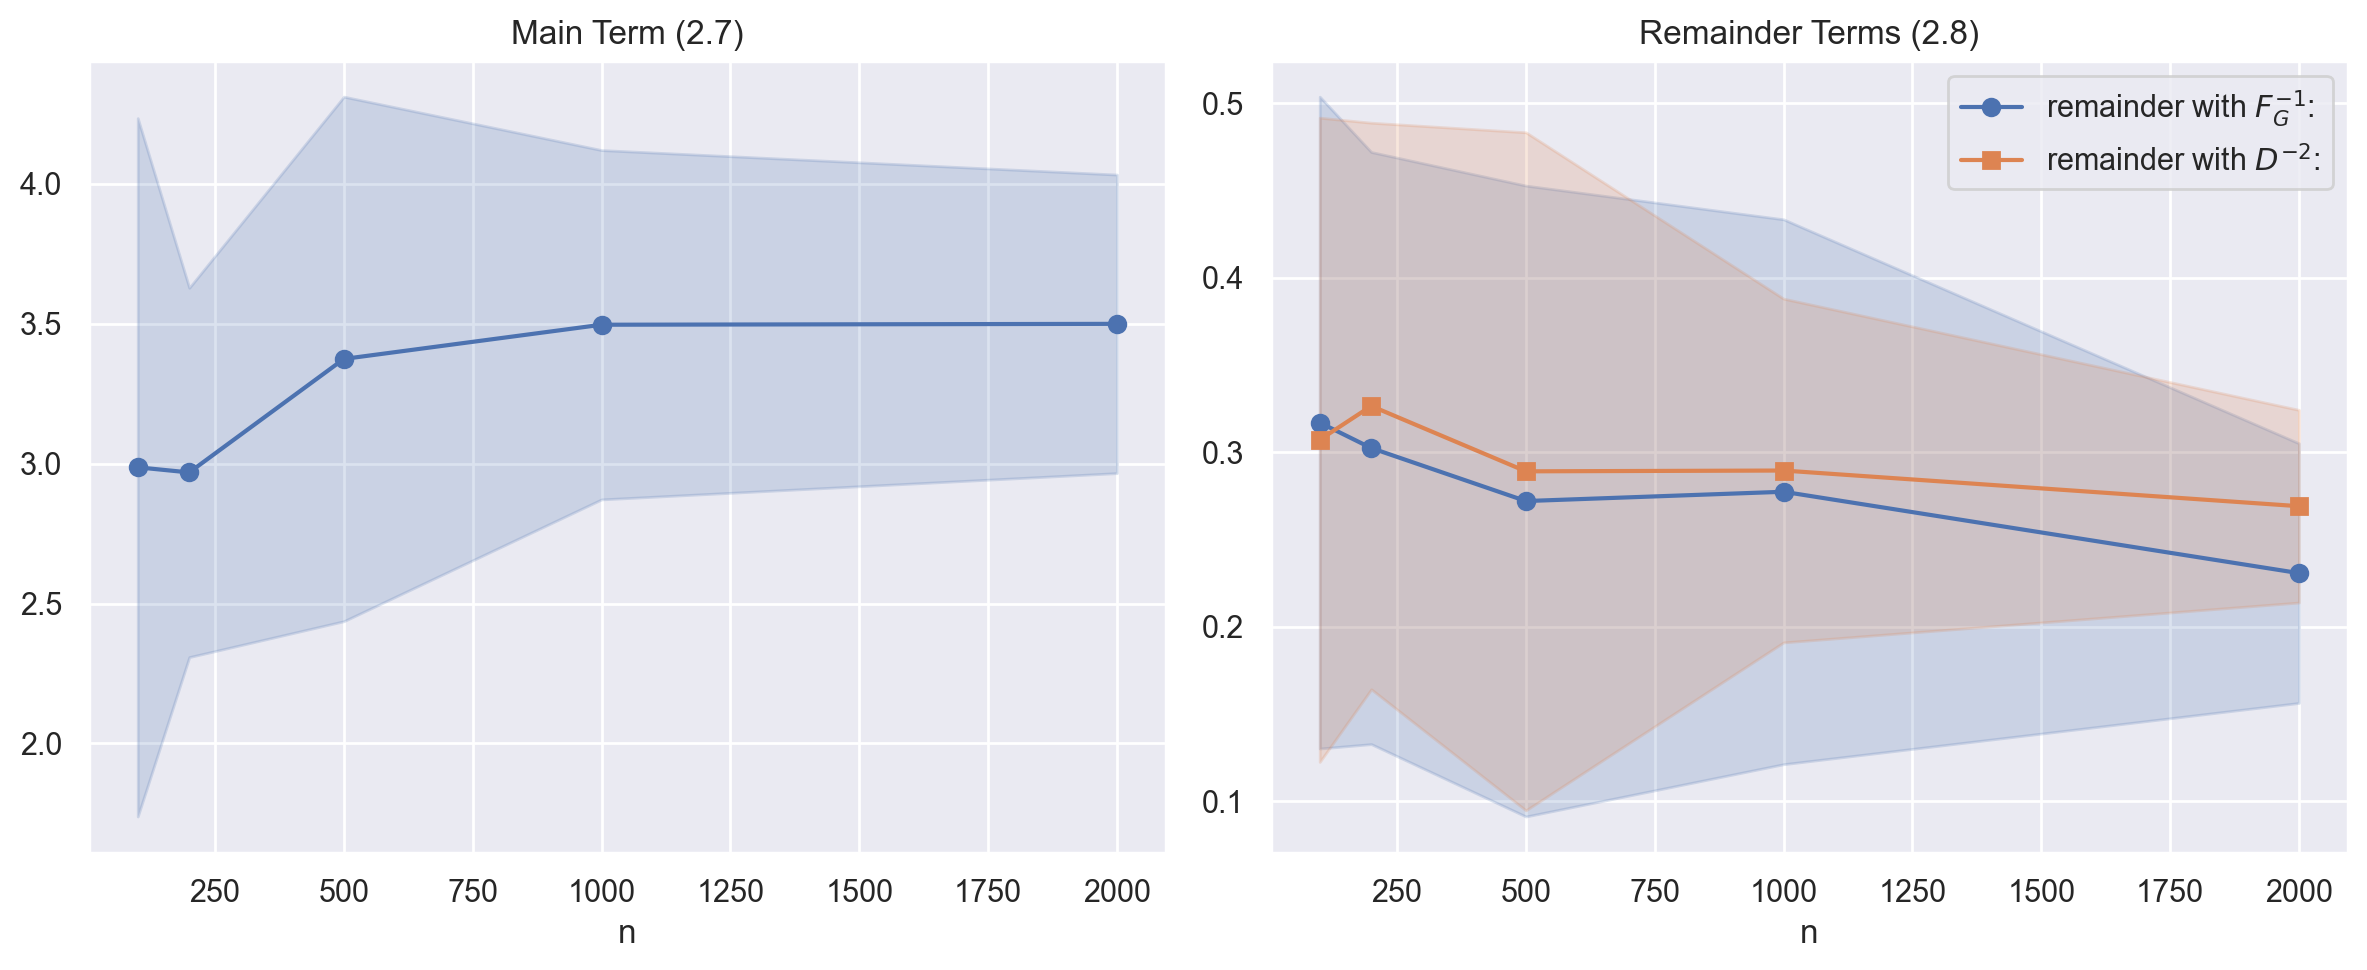

In [26]:
def theorem_2_3_from_n(trials=10):
    ns = [100, 200, 500, 1000, 2000]
    # ns = [30, 60, 90]
    L = 1
    v_range = [0, 2]
    g = 10000

    mean_left_2_7s = []
    mean_left_2_8_ups = []
    mean_left_2_8_downs = []
    std_left_2_7s = []
    std_left_2_8_ups = []
    std_left_2_8_downs = []
    for n in tqdm(ns):
        p = gao_p(n)
        left_2_7s = []
        left_2_8_ups = []
        left_2_8_downs = []
        for iter in range(trials):
            data = GaoData(n, p, L=L, v_range=v_range)
            F_val = F(data.v, data.N)
            F_g_val = F_g(data.v, data.N, g)
            D = np.sqrt(np.diag(F_val))

            v_g_tilda = calc_v_g_tilda_sum_reg(data, g)
            v_star = normalize(data.v)
            dzeta_grad = calc_zeta_grad(data, v_star)

            left_2_7 = inf_norm((v_g_tilda - v_star) * D)
            left_2_8_up = inf_norm(
                D * (v_g_tilda - v_star - np.linalg.inv(F_g_val) @ dzeta_grad)
            )
            left_2_8_down = inf_norm(
                D * (v_g_tilda - v_star - dzeta_grad / (D**2))
            )

            left_2_7s.append(left_2_7)
            left_2_8_ups.append(left_2_8_up)
            left_2_8_downs.append(left_2_8_down)

        mean_left_2_7s.append(np.mean(left_2_7s))
        mean_left_2_8_ups.append(np.mean(left_2_8_ups))
        mean_left_2_8_downs.append(np.mean(left_2_8_downs))
        std_left_2_7s.append(np.std(left_2_7s))
        std_left_2_8_ups.append(np.std(left_2_8_ups))
        std_left_2_8_downs.append(np.std(left_2_8_downs))

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # First subplot: left_2_7s
    # First subplot: left_2_7s using fill_between for error region
    axs[0].plot(ns, mean_left_2_7s, "o-", label="left_2_7")
    axs[0].fill_between(
        ns,
        [m - 2 * s for m, s in zip(mean_left_2_7s, std_left_2_7s)],
        [m + 2 * s for m, s in zip(mean_left_2_7s, std_left_2_7s)],
        color="C0",
        alpha=0.2,
    )
    axs[0].set_xlabel("n")
    axs[0].set_title("Main Term (2.7)")

    # Second subplot: left_2_8 ups and downs using fill_between for error regions
    axs[1].plot(
        ns, mean_left_2_8_ups, "o-", label=r"remainder with $F_G^{-1}$:"
    )
    axs[1].fill_between(
        ns,
        [m - 2 * s for m, s in zip(mean_left_2_8_ups, std_left_2_8_ups)],
        [m + 2 * s for m, s in zip(mean_left_2_8_ups, std_left_2_8_ups)],
        color="C0",
        alpha=0.2,
    )
    axs[1].plot(
        ns, mean_left_2_8_downs, "s-", label=r"remainder with $D^{-2}$:"
    )
    axs[1].fill_between(
        ns,
        [m - 2 * s for m, s in zip(mean_left_2_8_downs, std_left_2_8_downs)],
        [m + 2 * s for m, s in zip(mean_left_2_8_downs, std_left_2_8_downs)],
        color="C1",
        alpha=0.2,
    )
    axs[1].set_xlabel("n")
    axs[1].set_title("Remainder Terms (2.8)")
    axs[1].legend()

    plt.tight_layout()
    plt.show()


theorem_2_3_from_n(trials=10)

## Влияние параметров на N, до того как порисерчил в теории


100%|██████████| 20/20 [00:10<00:00,  1.98it/s]
/var/folders/60/myb807dx2ksbq9r6r4vtxbf00000gn/T/ipykernel_20480/982910725.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f"{y:.2f}" for y in plt.gca().get_yticks()])


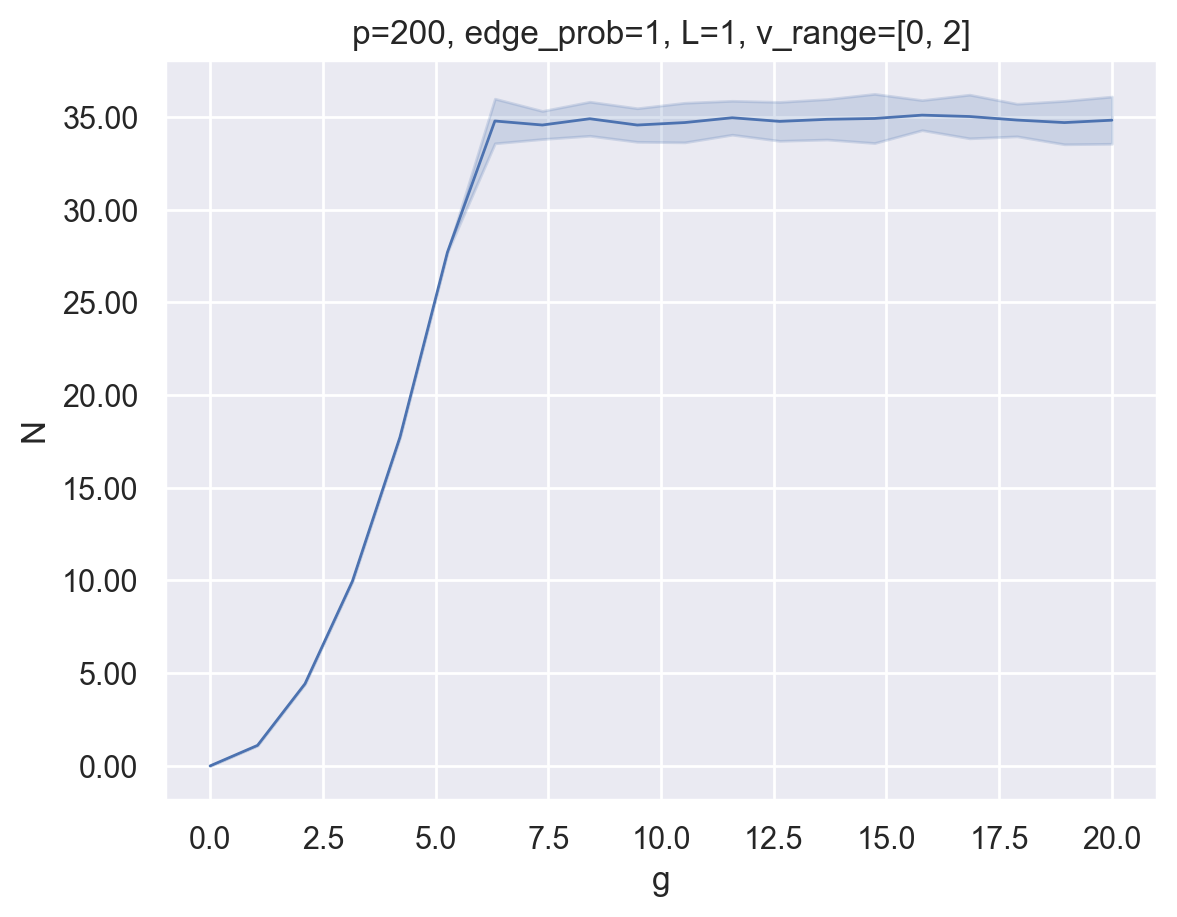

100%|██████████| 6/6 [00:03<00:00,  1.91it/s]
/var/folders/60/myb807dx2ksbq9r6r4vtxbf00000gn/T/ipykernel_20480/982910725.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f"{y:.2f}" for y in plt.gca().get_yticks()])


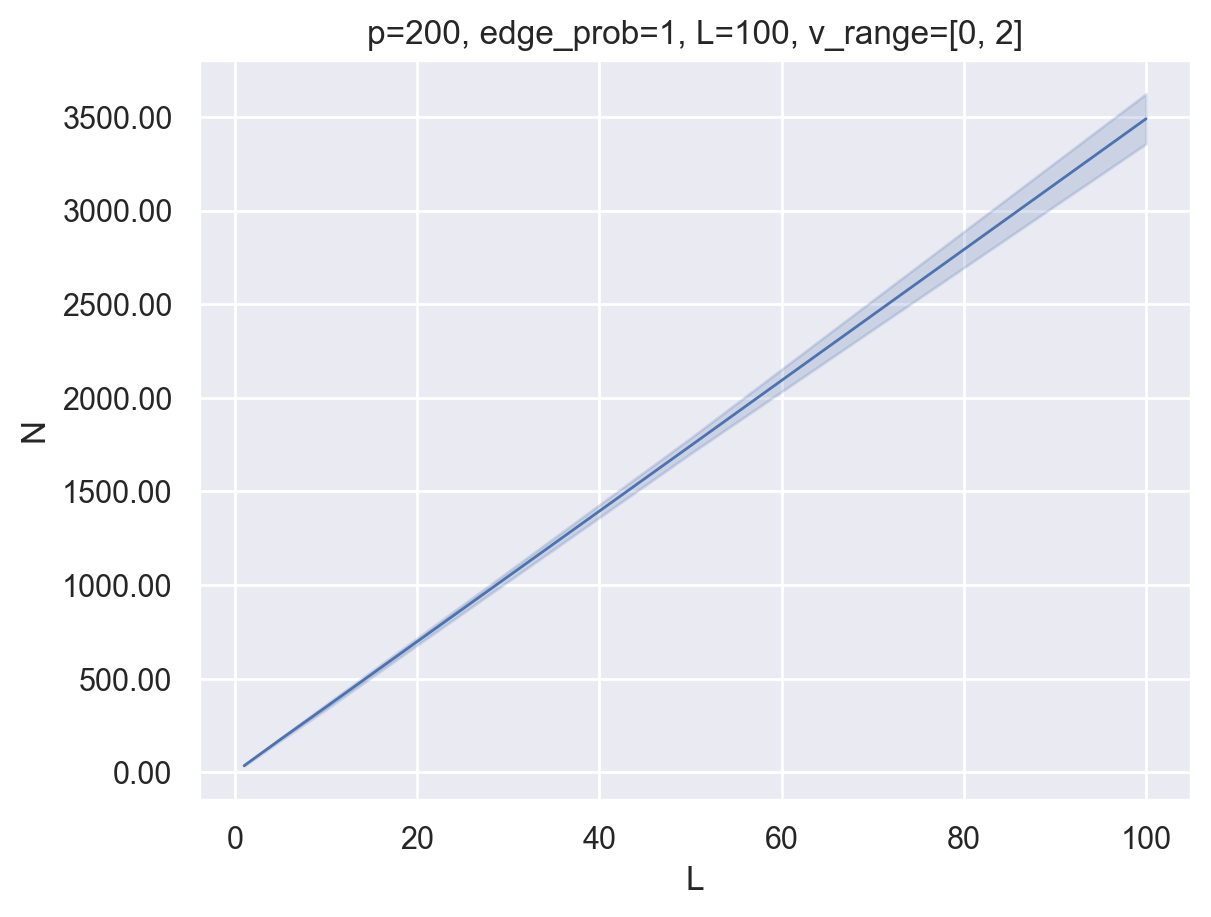

100%|██████████| 10/10 [00:03<00:00,  2.89it/s]
/var/folders/60/myb807dx2ksbq9r6r4vtxbf00000gn/T/ipykernel_20480/982910725.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f"{y:.2f}" for y in plt.gca().get_yticks()])


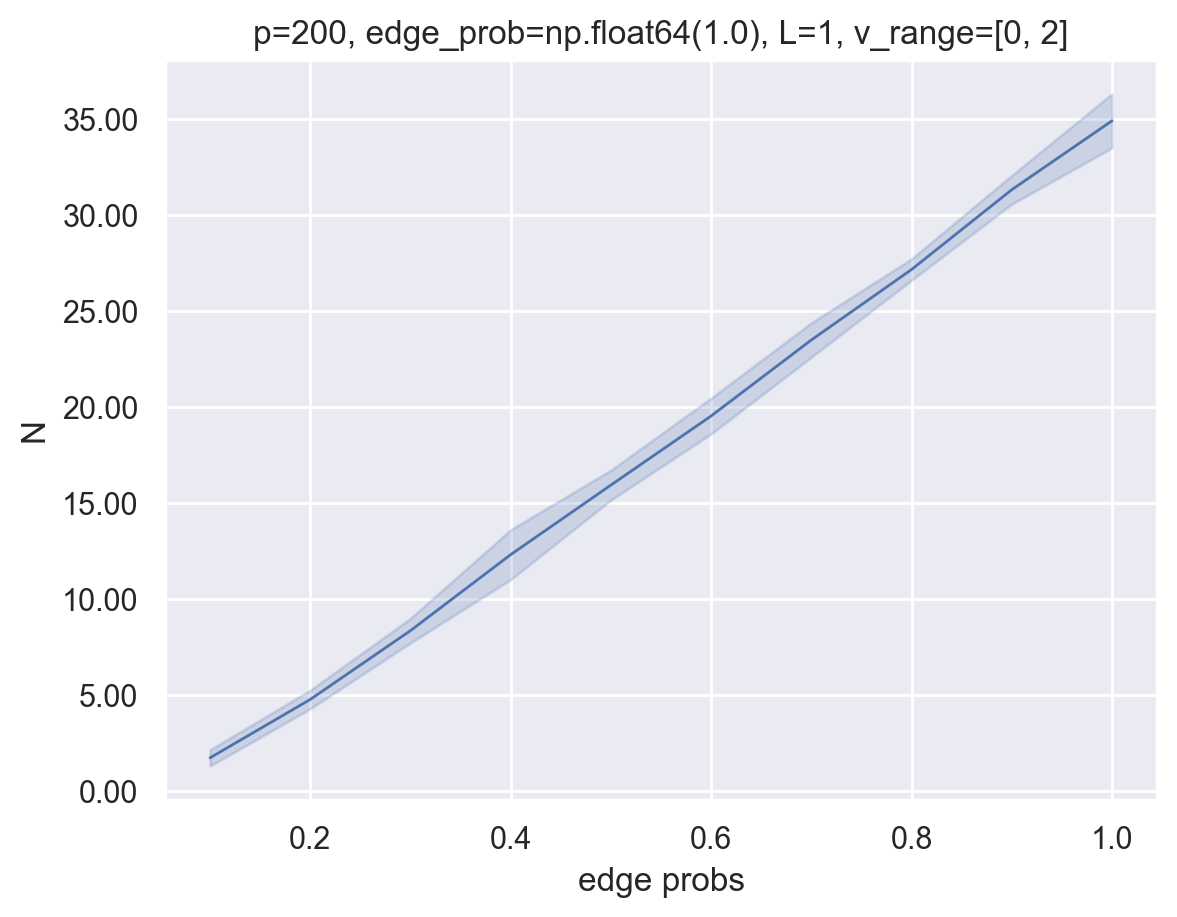

In [37]:
def plot_N_vs_prob():
    edge_probs = np.linspace(0.1, 1, 10)
    L = 1
    v_range = [0, 2]
    p = 200
    g = 100
    N_means = []
    N_stds = []
    iters = 10
    for edge_prob in tqdm(edge_probs):
        cur_ns = []
        for iter in range(iters):
            data = GaoData(p, edge_prob=edge_prob, L=L, v_range=v_range)
            F_g_val = F_g(data.v, data.N, g)
            N_val = constants.N(F_g_val)
            cur_ns.append(N_val)
        N_means.append(np.mean(cur_ns))
        N_stds.append(np.std(cur_ns))
    plt.plot(edge_probs, N_means, "b-", linewidth=1, label=r"average N")
    plt.fill_between(
        edge_probs,
        np.array(N_means) - 2 * np.array(N_stds),
        np.array(N_means) + 2 * np.array(N_stds),
        color="b",
        alpha=0.2,
    )
    plt.gca().set_yticklabels([f"{y:.2f}" for y in plt.gca().get_yticks()])
    plt.xlabel("edge probs")
    plt.ylabel("N")
    plt.title(f"{p=}, {edge_prob=}, {L=}, {v_range=}")
    plt.show()


def plot_N_vs_L():
    edge_prob = 1
    Ls = [1, 5, 10, 20, 50, 100]
    v_range = [0, 2]
    p = 200
    g = 100
    N_means = []
    N_stds = []
    iters = 10
    for L in tqdm(Ls):
        cur_ns = []
        for iter in range(iters):
            data = GaoData(p, edge_prob=edge_prob, L=L, v_range=v_range)
            F_g_val = F_g(data.v, data.N, g)
            N_val = constants.N(F_g_val)
            cur_ns.append(N_val)
        N_means.append(np.mean(cur_ns))
        N_stds.append(np.std(cur_ns))
    plt.plot(Ls, N_means, "b-", linewidth=1, label=r"average N")
    plt.fill_between(
        Ls,
        np.array(N_means) - 2 * np.array(N_stds),
        np.array(N_means) + 2 * np.array(N_stds),
        color="b",
        alpha=0.2,
    )
    plt.gca().set_yticklabels([f"{y:.2f}" for y in plt.gca().get_yticks()])
    plt.xlabel("L")
    plt.ylabel("N")
    plt.title(f"{p=}, {edge_prob=}, {L=}, {v_range=}")
    plt.show()


def plot_N_vs_g():
    edge_prob = 1
    L = 1
    v_range = [0, 2]
    p = 200
    gs = np.linspace(0, 20, 20)
    N_means = []
    N_stds = []
    iters = 10
    for g in tqdm(gs):
        cur_ns = []
        for iter in range(iters):
            data = GaoData(p, edge_prob=edge_prob, L=L, v_range=v_range)
            F_g_val = F_g(data.v, data.N, g)
            N_val = constants.N(F_g_val)
            cur_ns.append(N_val)
        N_means.append(np.mean(cur_ns))
        N_stds.append(np.std(cur_ns))
    plt.plot(gs, N_means, "b-", linewidth=1, label=r"average N")
    plt.fill_between(
        gs,
        np.array(N_means) - 2 * np.array(N_stds),
        np.array(N_means) + 2 * np.array(N_stds),
        color="b",
        alpha=0.2,
    )
    plt.gca().set_yticklabels([f"{y:.2f}" for y in plt.gca().get_yticks()])
    plt.xlabel("g")
    plt.ylabel("N")
    plt.title(f"{p=}, {edge_prob=}, {L=}, {v_range=}")
    plt.show()


plot_N_vs_g()
plot_N_vs_L()
plot_N_vs_prob()

F is a Laplacian, all eigenvectors are orthogonal to 111.
Actually the second eigenvalue of F is the first of F_g, when g is high enough


p <<> logn / n -> lambda_2 = 0 a.s.
p >> logn/n -> lambda_2 = np
p ~


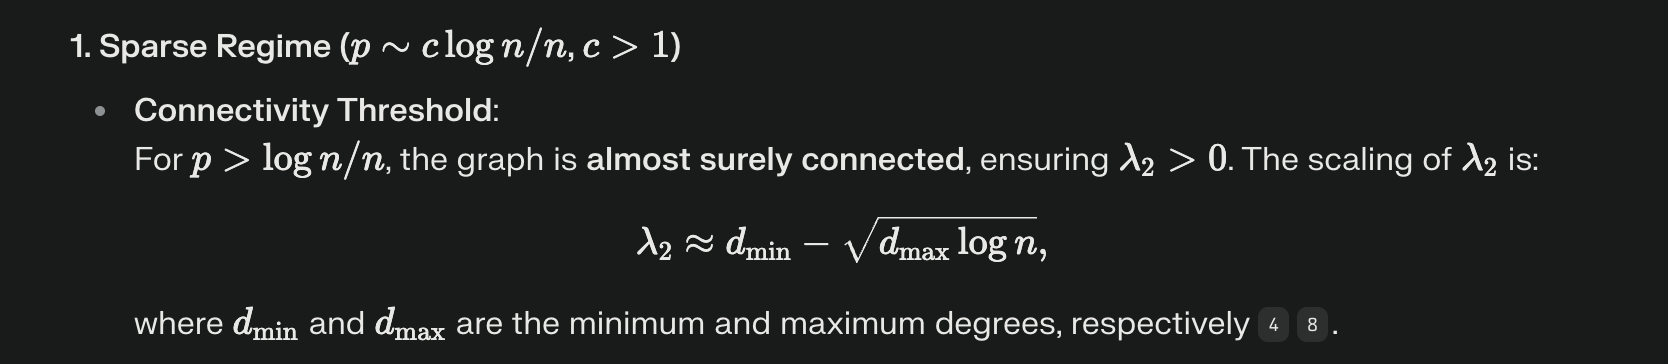


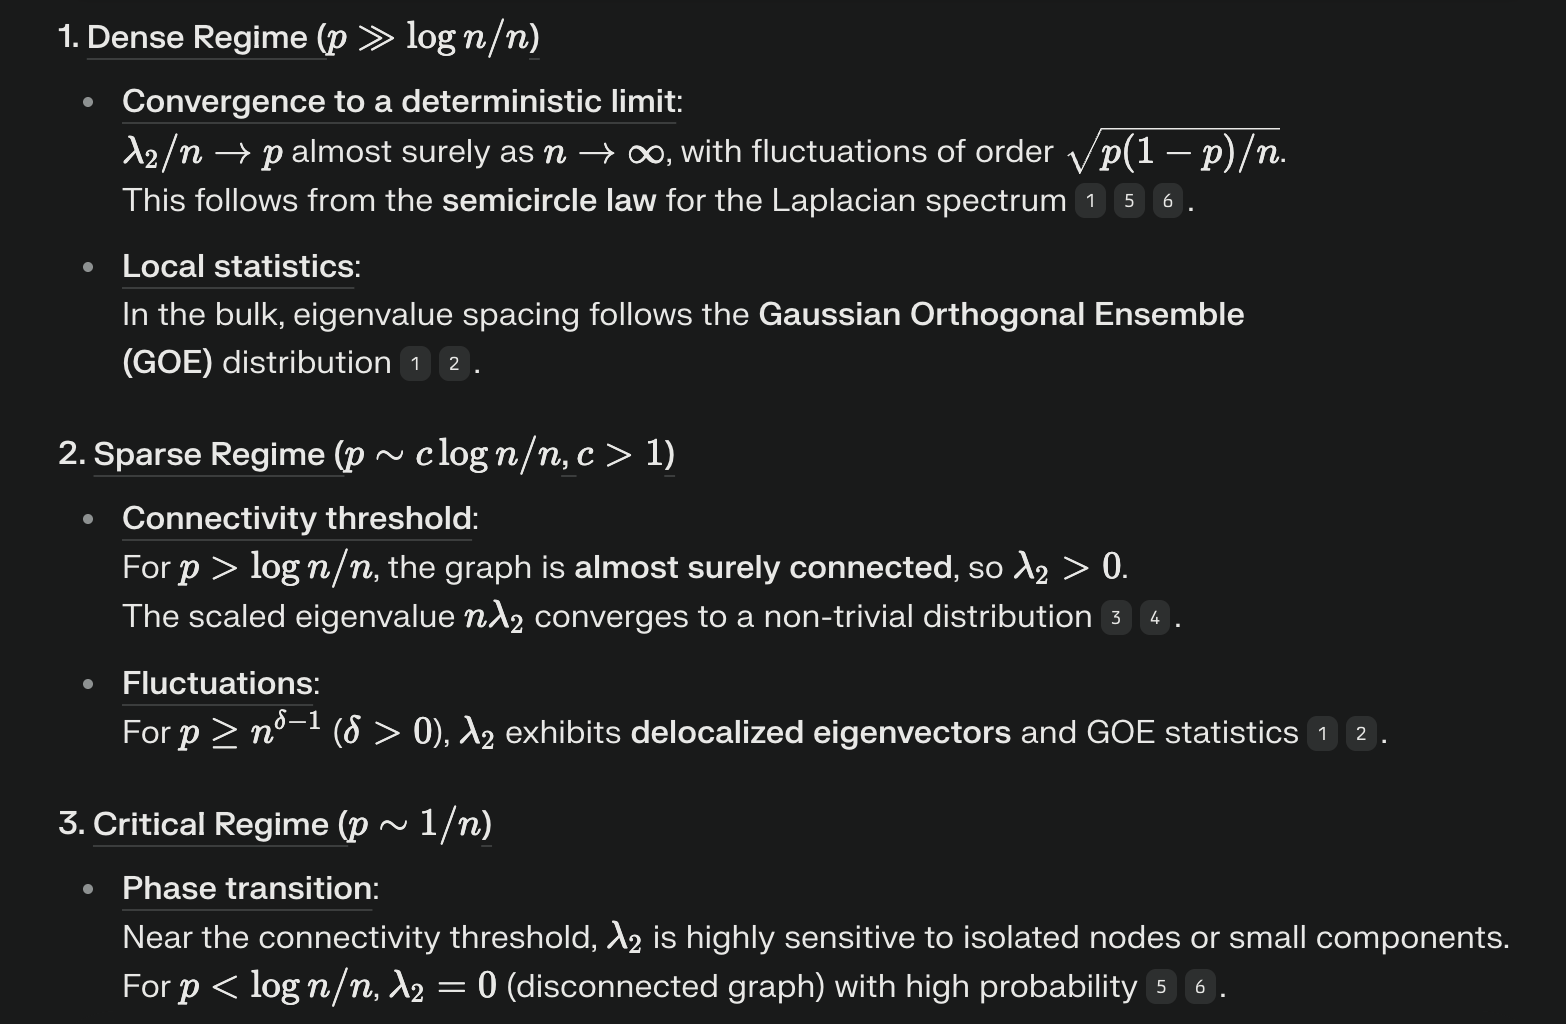


therefore L ~ min(Lnp, g^2)
